## 1. Importar librerías y cargar datos
Se importan las librerías necesarias y se cargan los textos de habilidades y descripciones de cada carrera en un diccionario para su análisis.

In [1]:
# 1. Importar librerías y cargar datos
import os
import pandas as pd
import pickle

ruta_base = 'todas_las_plataformas'
columnas_texto = ['skills', 'description']

corpus_original = {}
ofertas_por_carrera = {}

for subcarpeta in os.listdir(ruta_base):
    ruta_subcarpeta = os.path.join(ruta_base, subcarpeta)
    archivo_objetivo = os.path.join(ruta_subcarpeta, f'{subcarpeta}_Merged.csv')
    if os.path.isfile(archivo_objetivo):
        try:
            df = pd.read_csv(archivo_objetivo, dtype=str)
            ofertas_por_carrera[subcarpeta] = len(df)
            textos = []
            for col in columnas_texto:
                if col in df.columns:
                    textos.extend(df[col].dropna().tolist())
            corpus_original[subcarpeta] = ' '.join(textos)
        except Exception as e:
            print(f'Error leyendo {archivo_objetivo}: {e}')

df_carreras = pd.DataFrame({
    'carrera': list(corpus_original.keys()), 
    'texto': list(corpus_original.values())
})

print(f"Cargadas {len(df_carreras)} carreras")
df_carreras.head()

Cargadas 24 carreras


,carrera,texto
0,Administración_de_Empresas,"Servicio al cliente, Ventas, Gestión de efecti..."
1,Agroindustria,Cualquier desviación debe comunicarse al super...
2,Ciencia_de_Datos,Más de 3 años de experiencia en desarrollo de ...
3,Computación,"En general, estamos buscando un miembro del eq..."
4,Economía,"Sobresalir, Inteligencia de negocios, Power Bi..."


### Distribución de ofertas laborales por carrera

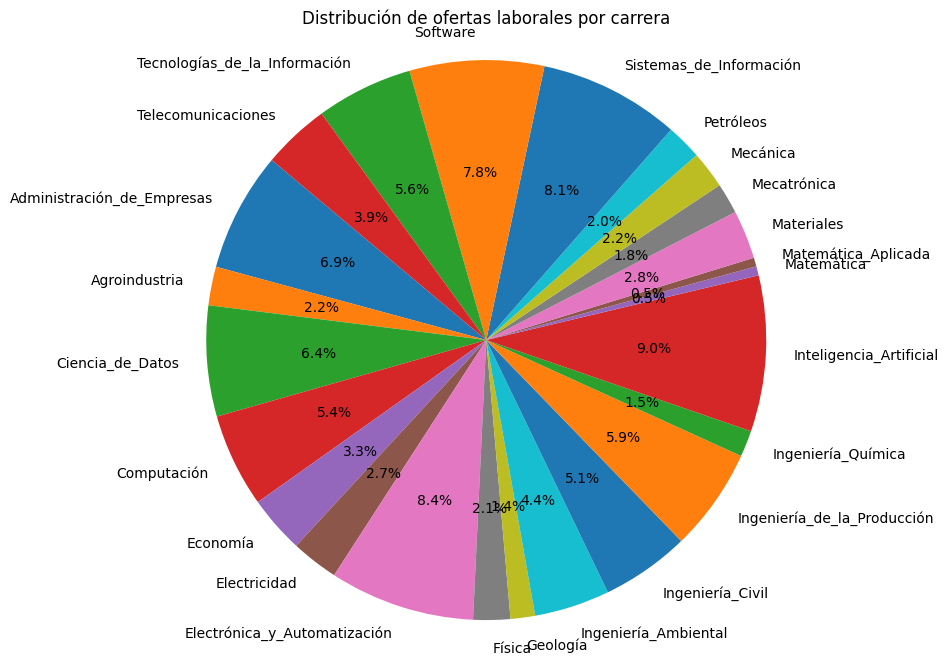

In [2]:
# Gráfica de pastel: número de ofertas laborales por carrera
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.pie(list(ofertas_por_carrera.values()), labels=list(ofertas_por_carrera.keys()), autopct='%1.1f%%', startangle=140)
plt.title('Distribución de ofertas laborales por carrera')
plt.axis('equal')
plt.show()

## 2. Definir whitelist de habilidades técnicas
Se define una lista de habilidades técnicas relevantes para todas las carreras, que será usada como vocabulario en el análisis.

In [3]:
# 2. Definir whitelist de habilidades técnicas
whitelist = {
    # Administracion de Empresas
    'excel', 'erp', 'project management', 'contabilidad', 'finanzas', 'marketing', 'gestión de recursos humanos', 'análisis financiero', 'planificación estratégica', 'costos', 'presupuestos', 'negociación', 'comercio exterior', 'logística', 'supply chain', 'crm', 'ventas', 'administración de empresas',
    # Agroindustria
    'normas iso', 'producción', 'control de plagas', 'buenas prácticas agrícolas', 'procesamiento de alimentos', 'agronomía', 'fertilización', 'riego', 'postcosecha', 'biotecnología', 'fitopatología', 'agroindustria', 'trazabilidad',
    # Ciencia de Datos
    'python', 'machine learning', 'data analysis', 'sql', 'r', 'big data', 'visualización de datos', 'estadística', 'deep learning', 'scikit-learn', 'pandas', 'numpy', 'matplotlib', 'data mining', 'análisis predictivo', 'regresión', 'clasificación', 'clustering', 'etl', 'modelado de datos', 'inteligencia artificial', 'análisis exploratorio', 'data science',
    # Computación
    'java', 'python', 'linux', 'git', 'algoritmos', 'estructura de datos', 'sistemas operativos', 'redes', 'seguridad informática', 'desarrollo web', 'html', 'css', 'javascript', 'php', 'sql', 'arquitectura de computadoras', 'compiladores', 'base de datos', 'ingeniería de software', 'testing', 'uml', 'scrum', 'devops',
    # Economía
    'econometría', 'estadística', 'finanzas', 'análisis de datos', 'excel', 'microeconomía', 'macroeconomía', 'modelos econométricos', 'análisis financiero', 'gestión de riesgos', 'mercados financieros', 'política económica', 'economía internacional', 'teoría de juegos', 'pronósticos', 'costos', 'presupuestos',
    # Electricidad
    'circuitos', 'electrónica', 'automatización', 'plc', 'motores eléctricos', 'instalaciones eléctricas', 'protecciones eléctricas', 'energía renovable', 'diseño eléctrico', 'subestaciones', 'mediciones eléctricas', 'generación eléctrica', 'distribución eléctrica', 'transformadores',
    # Electrónica y Automatización
    'plc', 'sensores', 'microcontroladores', 'automatización', 'circuitos', 'arduino', 'raspberry pi', 'robotica', 'sistemas embebidos', 'instrumentación', 'control automático', 'electrónica digital', 'electrónica analógica', 'scada', 'diseño de pcb', 'fpga', 'vhdl', 'proteus',
    # Física
    'simulación', 'matlab', 'python', 'análisis de datos', 'modelado', 'cálculo numérico', 'física computacional', 'teoría cuántica', 'óptica', 'mecánica clásica', 'termodinámica', 'electromagnetismo', 'análisis estadístico', 'instrumentación científica', 'latex',
    # Geología
    'gis', 'cartografía', 'sensores remotos', 'estratigrafía', 'geofísica', 'geotecnia', 'hidrogeología', 'mineralogía', 'mapeo geológico', 'modelado geológico', 'arcgis', 'qgis', 'geología estructural', 'geoquímica',
    # Ingeniería Ambiental
    'iso 14001', 'impacto ambiental', 'tratamiento de aguas', 'gis', 'normas ambientales', 'auditoría ambiental', 'gestión ambiental', 'residuos sólidos', 'remediación', 'evaluación ambiental', 'modelado ambiental', 'sustentabilidad', 'legislación ambiental', 'educación ambiental',
    # Ingeniería Civil
    'autocad', 'sap2000', 'estructuras', 'topografía', 'cype', 'civil 3d', 'revit', 'diseño estructural', 'hormigón armado', 'cálculo estructural', 'gestión de obras', 'presupuestos', 'planificación de obras', 'geotecnia', 'hidráulica', 'vialidad', 'urbanismo',
    # Ingeniería de la Producción
    'lean manufacturing', 'six sigma', 'producción', 'erp', 'gestión de calidad', 'logística', 'supply chain', 'kaizen', 'just in time', 'mantenimiento industrial', 'planificación de la producción', 'optimización de procesos', 'simulación de procesos', 'costos industriales', 'mejora continua',
    # Ingeniería Química
    'procesos químicos', 'simulación', 'hysys', 'laboratorio', 'química analítica', 'balances de materia y energía', 'cromatografía', 'diseño de plantas', 'control de procesos', 'termodinámica química', 'ingeniería de procesos', 'análisis instrumental',
    # Inteligencia Artificial
    'machine learning', 'deep learning', 'python', 'nlp', 'tensorflow', 'pytorch', 'redes neuronales', 'aprendizaje supervisado', 'aprendizaje no supervisado', 'procesamiento de lenguaje natural', 'scikit-learn', 'keras', 'inteligencia artificial', 'data mining',
    # Matemática
    'matlab', 'python', 'estadística', 'modelado', 'optimización', 'análisis numérico', 'ecuaciones diferenciales', 'probabilidad', 'teoría de números', 'álgebra lineal', 'cálculo', 'matemática aplicada', 'simulación',
    # Matemática Aplicada
    'matlab', 'python', 'estadística', 'simulación', 'optimización', 'análisis numérico', 'modelado matemático', 'ecuaciones diferenciales', 'cálculo', 'programación matemática',
    # Materiales
    'caracterización', 'microscopía', 'ensayos mecánicos', 'simulación', 'laboratorio', 'metalografía', 'tratamientos térmicos', 'corrosión', 'análisis de materiales', 'propiedades mecánicas', 'microscopía electrónica',
    # Mecánica
    'solidworks', 'autocad', 'mecánica de materiales', 'catia', 'simulación', 'diseño mecánico', 'manufactura', 'elementos finitos', 'dinámica', 'termodinámica', 'cálculo estructural', 'prototipado', 'mantenimiento industrial',
    # Mecatrónica
    'plc', 'robotica', 'automatización', 'sensores', 'microcontroladores', 'sistemas embebidos', 'control automático', 'diseño mecánico', 'instrumentación', 'arduino', 'raspberry pi', 'vision artificial',
    # Petróleos
    'reservorios', 'perforación', 'simulación', 'petrel', 'ingeniería de yacimientos', 'geomecánica', 'ingeniería de perforación', 'producción petrolera', 'modelado de reservorios', 'ingeniería de producción',
    # Sistemas de Información
    'sql', 'erp', 'power bi', 'python', 'gestión de datos', 'business intelligence', 'data warehouse', 'etl', 'visualización de datos', 'base de datos', 'análisis de sistemas', 'sistemas de información',
    # Software
    'python', 'java', 'git', 'javascript', 'typescript', 'html', 'css', 'react', 'node.js', 'desarrollo web', 'scrum', 'uml', 'testing', 'devops', 'docker', 'api', 'rest', 'php',
    # Tecnologías de la Información
    'sql', 'cloud computing', 'python', 'linux', 'ciberseguridad', 'virtualización', 'redes', 'windows server', 'azure', 'aws', 'soporte técnico', 'seguridad informática', 'sistemas operativos', 'backup', 'firewall', 'vpn',
    # Telecomunicaciones
    'redes', 'cisco', 'fibra óptica', 'wireless', 'comunicaciones digitales', 'telefonía ip', 'microondas', 'radioenlaces', 'lte', 'routing', 'switching', 'voz sobre ip', 'protocolos de comunicación',
}

habilidades = sorted([h.lower() for h in whitelist])
print(f"Total de habilidades únicas: {len(habilidades)}")

Total de habilidades únicas: 271


## 3. Construir matriz término-documento y TF-IDF
Se crea una matriz donde cada fila es una habilidad y cada columna una carrera.

In [4]:
# 3. Construir matriz término-documento (habilidad-carrera)
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

carreras = list(corpus_original.keys())
corpus = [corpus_original[c].lower() for c in carreras]

vectorizer = CountVectorizer(vocabulary=habilidades, analyzer='word', ngram_range=(1, 5), lowercase=True)
X = vectorizer.fit_transform(corpus)
matriz_td = pd.DataFrame(X.T.toarray(), index=vectorizer.get_feature_names_out(), columns=carreras)

print("Matriz término-documento creada")
matriz_td.head()

Matriz término-documento creada


,Administración_de_Empresas,Agroindustria,Ciencia_de_Datos,Computación,Economía,Electricidad,Electrónica_y_Automatización,Física,Geología,Ingeniería_Ambiental,...,Matemática,Matemática_Aplicada,Materiales,Mecatrónica,Mecánica,Petróleos,Sistemas_de_Información,Software,Tecnologías_de_la_Información,Telecomunicaciones
administración de empresas,164,7,11,10,11,3,13,2,3,25,...,0,0,7,2,2,1,22,0,15,12
agroindustria,0,36,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
agronomía,1,8,0,0,2,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
algoritmos,0,0,77,6,0,0,0,0,0,0,...,0,1,0,8,0,0,2,195,0,7
análisis de datos,23,2,182,21,8,0,3,2,1,14,...,4,6,10,6,3,2,114,99,39,19


## 4. Agrupar habilidades con embeddings
Se agrupan habilidades similares usando embeddings para reducir la dimensionalidad.

In [5]:
# 4. Agrupar habilidades con n-gramas y embeddings
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize
import hdbscan
from collections import defaultdict

def generar_ngrams(termino):
    palabras = termino.split()
    ngrams = []
    if len(palabras) == 1:
        ngrams.append(termino)
    else:
        for n in [2, 3]:
            ngrams += [' '.join(palabras[i:i+n]) for i in range(len(palabras)-n+1)]
        ngrams.append(termino)
    return ngrams

habilidades_ngrams = []
hab_to_ngrams = {}
for h in habilidades:
    ngrams = generar_ngrams(h)
    habilidades_ngrams.extend(ngrams)
    hab_to_ngrams[h] = ngrams

habilidades_ngrams = list(set(habilidades_ngrams))

print("Generando embeddings...")
modelo_bge_ngram = SentenceTransformer('BAAI/bge-m3')
embeddings_bge_ngrams = modelo_bge_ngram.encode(habilidades_ngrams, show_progress_bar=True)
emb_norm = normalize(embeddings_bge_ngrams)

print("Clustering con HDBSCAN...")
clusterer_bge_ngram = hdbscan.HDBSCAN(
    min_cluster_size=2, 
    min_samples=1, 
    metric='euclidean', 
    cluster_selection_method='eom', 
    prediction_data=True
)
labels_bge_ngrams = clusterer_bge_ngram.fit_predict(emb_norm)

grupos_bge_ngram = defaultdict(list)
gram_to_label_bge = {ng: label for ng, label in zip(habilidades_ngrams, labels_bge_ngrams) if label != -1}

for h, ngrams in hab_to_ngrams.items():
    etiquetas = [gram_to_label_bge[ng] for ng in ngrams if ng in gram_to_label_bge]
    if etiquetas:
        label = max(set(etiquetas), key=etiquetas.count)
        grupos_bge_ngram[label].append(h)

# Forzar separación de grupos conflictivos
def forzar_separacion(grupos, habilidades_separar):
    for hab in habilidades_separar:
        for label, terms in list(grupos.items()):
            if hab in terms:
                terms.remove(hab)
                if not terms:
                    del grupos[label]
        nuevo_label = f'unico_{hab}'
        grupos[nuevo_label] = [hab]

habilidades_separar = [
    'planificación de la producción', 'planificación de obras',
    'procesamiento de alimentos', 'procesamiento de lenguaje natural',
    'redes', 'redes neuronales'
]

forzar_separacion(grupos_bge_ngram, habilidades_separar)

print(f"Número de grupos creados: {len(grupos_bge_ngram)}")

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Generando embeddings...


Batches: 100%|██████████| 11/11 [00:39<00:00,  3.61s/it]
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clustering con HDBSCAN...
Número de grupos creados: 69
Número de grupos creados: 69


## 5. Construir matriz TF-IDF por grupos

In [6]:
# 5. Construir matriz término-documento por grupos
matriz_td_emb = pd.DataFrame(0, index=grupos_bge_ngram.keys(), columns=matriz_td.columns)
grupo_labels = []

for label, terms in grupos_bge_ngram.items():
    matriz_td_emb.loc[label] = matriz_td.loc[terms].sum()
    grupo_labels.append(', '.join(grupos_bge_ngram[label][:3]) + (' ...' if len(grupos_bge_ngram[label])>3 else ''))

matriz_td_emb.index = grupo_labels

# Calcular TF-IDF
tfidf_emb = TfidfTransformer(norm='l2').fit_transform(matriz_td_emb.values)
tfidf_emb_df = pd.DataFrame(tfidf_emb.toarray(), index=matriz_td_emb.index, columns=matriz_td_emb.columns)
espacio_vectorial_tfidf = tfidf_emb_df.T

print("Espacio vectorial TF-IDF creado")
espacio_vectorial_tfidf.head()

Espacio vectorial TF-IDF creado


,"administración de empresas, gestión de calidad, gestión de datos ...","agroindustria, agronomía","análisis de datos, análisis de materiales, análisis de sistemas ...","aprendizaje no supervisado, aprendizaje supervisado","arcgis, qgis",arquitectura de computadoras,"aws, wireless",balances de materia y energía,base de datos,buenas prácticas agrícolas,...,"teoría cuántica, teoría de juegos, teoría de números","termodinámica, termodinámica química","tratamiento de aguas, tratamientos térmicos",visualización de datos,planificación de la producción,planificación de obras,procesamiento de alimentos,procesamiento de lenguaje natural,redes,redes neuronales
Administración_de_Empresas,0.690972,0.020622,0.086128,0.000000,0.032851,0.0,0.005931,0.0,0.255778,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.045186,0.00000
Agroindustria,0.057360,0.989977,0.008291,0.000000,0.000000,0.0,0.000000,0.0,0.009302,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.189847,0.000000,0.004541,0.00000
Ciencia_de_Datos,0.207843,0.000000,0.628787,0.973685,0.055096,0.0,0.062609,0.0,0.207343,0.0,...,1.0,0.0,0.0,0.871982,0.0,0.0,0.000000,0.054627,0.023434,0.72469
Computación,0.140326,0.000000,0.179353,0.000000,0.000000,1.0,0.061067,0.0,0.142529,0.0,...,0.0,0.0,0.0,0.074365,0.0,0.0,0.000000,0.000000,0.042096,0.00000
Economía,0.050068,0.045825,0.025331,0.000000,0.072998,0.0,0.001551,0.0,0.009473,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.001321,0.00000


## 6. Procesar carreras académicas EPN

In [7]:
# 6. Extraer información de carreras_epn/carreras_epn.csv
ruta_csv = 'carreras_epn/carreras_epn.csv'
df_epn = pd.read_csv(ruta_csv, dtype=str)
columnas_texto = ['descripcion', 'objetivos', 'perfil_egreso', 'perfil_profesional']
df_epn['texto'] = df_epn[columnas_texto].fillna('').agg(' '.join, axis=1)
df_epn_final = df_epn[['nombre', 'texto']].rename(columns={'nombre': 'carrera'})

# Transformar carreras EPN al espacio vectorial
vectorizer_epn = CountVectorizer(vocabulary=habilidades, analyzer='word', ngram_range=(1, 5), lowercase=True)
corpus_epn = df_epn_final['texto'].str.lower().tolist()
X_epn = vectorizer_epn.transform(corpus_epn)
matriz_td_epn = pd.DataFrame(X_epn.T.toarray(), index=vectorizer_epn.get_feature_names_out(), columns=df_epn_final['carrera'])

# Construir matriz de grupos para las carreras EPN
matriz_epn_69d = pd.DataFrame(0, index=grupos_bge_ngram.keys(), columns=matriz_td_epn.columns)
for label, terms in grupos_bge_ngram.items():
    matriz_epn_69d.loc[label] = matriz_td_epn.loc[terms].sum()

matriz_epn_69d.index = [', '.join(grupos_bge_ngram[label][:3]) + (' ...' if len(grupos_bge_ngram[label])>3 else '') for label in grupos_bge_ngram.keys()]

# Transformar a espacio TF-IDF
tfidf_epn = TfidfTransformer(norm='l2').fit(matriz_epn_69d.values)
tfidf_epn_69d = pd.DataFrame(tfidf_epn.transform(matriz_epn_69d.values).toarray(), index=matriz_epn_69d.index, columns=matriz_epn_69d.columns)

print("Carreras EPN vectorizadas")
tfidf_epn_69d.T.head()

Carreras EPN vectorizadas


,"administración de empresas, gestión de calidad, gestión de datos ...","agroindustria, agronomía","análisis de datos, análisis de materiales, análisis de sistemas ...","aprendizaje no supervisado, aprendizaje supervisado","arcgis, qgis",arquitectura de computadoras,"aws, wireless",balances de materia y energía,base de datos,buenas prácticas agrícolas,...,"teoría cuántica, teoría de juegos, teoría de números","termodinámica, termodinámica química","tratamiento de aguas, tratamientos térmicos",visualización de datos,planificación de la producción,planificación de obras,procesamiento de alimentos,procesamiento de lenguaje natural,redes,redes neuronales
carrera,,,,,,,,,,,,,,,,,,,,,
Licenciatura Administracion De Empresas,0.7612,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Ingenieria Agroindustria,0.0000,1.0,0.179854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Ingenieria Ambiental,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Ciencias De Datos E Inteligencia Artificial,0.0000,0.0,0.788573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Ingenieria En Ciencias De La Computacion,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213744,0.0


## 7. Guardar datos procesados

In [8]:
# 7. Guardar todos los datos procesados en archivos pickle
datos_procesados = {
    'habilidades': habilidades,
    'grupos_bge_ngram': dict(grupos_bge_ngram),
    'matriz_td': matriz_td,
    'tfidf_emb_df': tfidf_emb_df,
    'espacio_vectorial_tfidf': espacio_vectorial_tfidf,
    'tfidf_epn_69d': tfidf_epn_69d,
    'ofertas_por_carrera': ofertas_por_carrera,
    'corpus_original': corpus_original,
    'carreras': carreras
}

with open('datos_procesados.pkl', 'wb') as f:
    pickle.dump(datos_procesados, f)

print("✓ Datos guardados en 'datos_procesados.pkl'")
print("\nArchivos generados:")
print("- datos_procesados.pkl: Contiene todos los datos procesados para uso en otros notebooks")

✓ Datos guardados en 'datos_procesados.pkl'

Archivos generados:
- datos_procesados.pkl: Contiene todos los datos procesados para uso en otros notebooks
